In [2]:
# Importing  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import warnings
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


pd.set_option('display.max_columns', 20)
pd.set_option('display.expand_frame_repr', False)


warnings.filterwarnings('ignore');

# Importing dataset from directory
train_data = pd.read_csv('adult.test', header=None)
# Columns name we can find from data description
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship',
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


train_data.columns = col_labels


print(train_data.head(10))
print('\n')
print(train_data.isnull().sum())
print('\n')
print(train_data.describe().T)

#data transformations are did
train_data['workclass'] = train_data.workclass.str.replace('?', 'Private')
train_data['occupation'] = train_data.occupation.str.replace('?', 'Prof-specialty')
train_data['native_country'] = train_data.native_country.str.replace('?', 'United-States')
le = LabelEncoder()
train_data['workclass'] = le.fit_transform(train_data['workclass'])
train_data['marital_status'] = le.fit_transform(train_data['marital_status'])
train_data['education'] = le.fit_transform(train_data['education'])
train_data['occupation'] = le.fit_transform(train_data['occupation'])
train_data['relationship'] = le.fit_transform(train_data['relationship'])
train_data['race'] = le.fit_transform(train_data['race'])
train_data['sex'] = le.fit_transform(train_data['sex'])
train_data['native_country'] = le.fit_transform(train_data['native_country'])



train_data['income'] = train_data['income'].str.replace('.', '')
train_data['income']  = train_data.income.replace({" <=50K": 0, " >50K": 1}) # target


# fill na values to zeros
train_data = train_data.fillna(0)

print(train_data.head(10))

print(train_data['income'].value_counts())


   age          workclass  fnlwgt      education  education_num       marital_status          occupation    relationship    race      sex  capital_gain  capital_loss  hours_per_week  native_country   income
0   25            Private  226802           11th              7        Never-married   Machine-op-inspct       Own-child   Black     Male             0             0              40   United-States   <=50K.
1   38            Private   89814        HS-grad              9   Married-civ-spouse     Farming-fishing         Husband   White     Male             0             0              50   United-States   <=50K.
2   28          Local-gov  336951     Assoc-acdm             12   Married-civ-spouse     Protective-serv         Husband   White     Male             0             0              40   United-States    >50K.
3   44            Private  160323   Some-college             10   Married-civ-spouse   Machine-op-inspct         Husband   Black     Male          7688             0       

DECISION TREE 1-Gain ratio

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# replace ? symbols with nan values
train_data = train_data.replace('?', np.nan)

# drop na values
train_data = train_data.dropna()


# Split data into features and target
x = train_data.drop('income', axis=1)
y = train_data['income']


# Split data into training and testing sets, %20 test set and %80 for training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7, )
tree.fit(X_train, y_train)

# Evaluate test test
y_pred = tree.predict

y_test = y_test.astype(int)
y_pred = tree.predict(X_test).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7420
           1       0.81      0.52      0.63      2349

    accuracy                           0.86      9769
   macro avg       0.84      0.74      0.77      9769
weighted avg       0.85      0.86      0.84      9769

Confusion Matrix:
[[7134  286]
 [1128 1221]]
Accuracy: 85.53%


Bagging Ensemble

In [4]:
#it takes tree for the  bagging en uses training set and test sets
bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, random_state=42)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7420
           1       0.81      0.52      0.63      2349

    accuracy                           0.85      9769
   macro avg       0.84      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769

Confusion Matrix:
[[7133  287]
 [1131 1218]]
Accuracy: 85.48%


Boosting Ensemble

In [5]:
# I choosed adaboostclassifier for the ensembling
boosting_ensemble = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.6, random_state=42)
boosting_ensemble.fit(X_train, y_train)

y_pred = boosting_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7420
           1       0.79      0.61      0.69      2349

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Confusion Matrix:
[[7030  390]
 [ 906 1443]]
Accuracy: 86.73%


Decision Tree Visualization

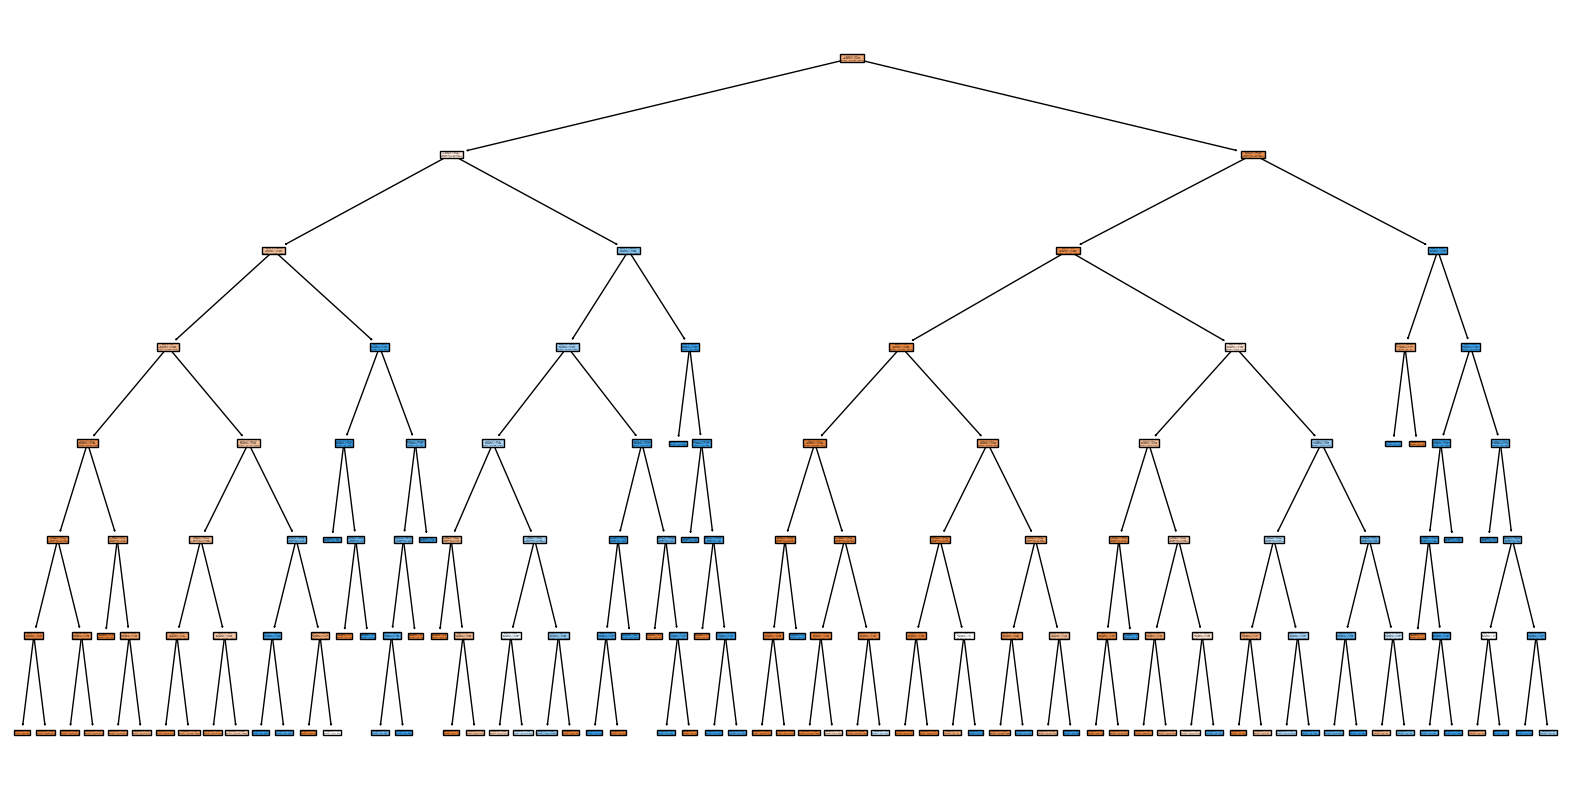

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True)
plt.show()

DECISION TREE 2-GINI INDEX

In [ ]:

# Define Decision tree model
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_gini.fit(X_train, y_train)

# evalaute model perfromance on the test data
y_pred = tree_gini.predict

tree_gini.fit(X_train, y_train)


y_test = y_test.astype(int)
y_pred = tree_gini.predict(X_test).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

print('\n')
#cross validation  is applied
cv_gini = cross_val_score(tree_gini, x, y, cv=10)
print("cross validation for gini  ")
print(+cv_gini)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7408
           1       0.76      0.48      0.59      2361

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.74      9769
weighted avg       0.83      0.84      0.82      9769

Confusion Matrix:
[[7056  352]
 [1231 1130]]
Accuracy: 83.80%


cross validation for gini  
[0.83664278 0.83398158 0.84009009 0.83660934 0.83988534 0.83722359
 0.84561835 0.83722359 0.84725635 0.84193284]




Bagging Ensemble



In [ ]:
bagging = BaggingClassifier(base_estimator=tree_gini, n_estimators=15, random_state=42)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging Ensemble Accuracy: {:.2%}'.format(accuracy))

Bagging Ensemble Accuracy: 83.78%


Boosting Ensemble

In [ ]:
boosting_ensemble = AdaBoostClassifier(base_estimator=tree_gini, n_estimators=10, learning_rate=0.6, random_state=42)
boosting_ensemble.fit(X_train, y_train)

y_pred = boosting_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Boosting Ensemble Accuracy: {:.2%}'.format(accuracy))

Boosting Ensemble Accuracy: 86.12%


Naive Bayes

In [ ]:

# Split data into features and target
x = train_data.drop('income', axis=1)
y = train_data['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train the model
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naivemodel.predict(X_test)

# Calculate accuracy
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))


              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7353
           1       0.66      0.30      0.42      2416

    accuracy                           0.79      9769
   macro avg       0.73      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769

Confusion Matrix:
[[6975  378]
 [1682  734]]
Accuracy: 78.91%


NAIVE BAYES BAGGING ENSEMBLE

In [ ]:
bagging = BaggingClassifier(base_estimator=naivemodel, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Ensemble Accuracy: {:.2f}%".format(accuracy*100))


Bagging Ensemble Accuracy: 78.90%


NAIVE BAYES BOOSTING ENSEMBLE

In [ ]:
boosting_ensemble = AdaBoostClassifier(base_estimator=naivemodel, n_estimators=50, learning_rate=0.7, random_state=42)
boosting_ensemble.fit(X_train, y_train)

y_pred = boosting_ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Boosting Ensemble Accuracy: {:.2f}%".format(accuracy*100))


Boosting Ensemble Accuracy: 68.36%


NEURAL NETWORKS (1 HIDDEN LAYER)

In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
def create_ann():
  ann_model = keras.Sequential()

  # Add layer 1
  ann_model.add(Dense(units=16, activation='relu', input_dim=14))

  ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  # Model construction
  ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return ann_model

ann_model1= create_ann()


# train model

ann_model1.fit(X_train, y_train, epochs=15, batch_size=30)

# Evaluate model
score = ann_model1.evaluate(X_test, y_test, batch_size=30)

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print('Test loss:', score[0])
print('Accuracy: {:.2%}'.format(score[1]))

Bagging Ensemble

In [ ]:
keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(
                            create_ann,
                            epochs=15,
                            verbose=True)

keras_clf._estimator_type = "classifier"
bagging = BaggingClassifier(base_estimator=keras_clf, n_estimators=15, random_state=42)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging Ensemble Accuracy: {:.2%}'.format(accuracy))

Epoch 1/15
1222/1222 [==============================] - 3s 2ms/step - loss: 25.1866 - accuracy: 0.6875
Epoch 2/15
1222/1222 [==============================] - 4s 3ms/step - loss: 22.5175 - accuracy: 0.6865
Epoch 3/15
1222/1222 [==============================] - 4s 3ms/step - loss: 19.2378 - accuracy: 0.6903
Epoch 4/15
1222/1222 [==============================] - 2s 2ms/step - loss: 18.0911 - accuracy: 0.6884
Epoch 5/15
1222/1222 [==============================] - 4s 4ms/step - loss: 14.9649 - accuracy: 0.6917
Epoch 6/15
1222/1222 [==============================] - 4s 3ms/step - loss: 15.8073 - accuracy: 0.6859
Epoch 7/15
1222/1222 [==============================] - 7s 5ms/step - loss: 14.3396 - accuracy: 0.6892
Epoch 8/15
1222/1222 [==============================] - 4s 3ms/step - loss: 13.7022 - accuracy: 0.6918
Epoch 9/15
1222/1222 [==============================] - 3s 3ms/step - loss: 11.1577 - accuracy: 0.6916
Epoch 10/15
1222/1222 [==============================] - 4s 3ms/step - lo

Boosting Ensemble

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import GradientBoostingClassifier


ensemble_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.3, max_depth=4)
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print('Test loss:', score[0])
print('Accuracy: {:.2%}'.format(score[1]))

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7438
           1       0.78      0.64      0.70      2331

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769

Confusion matrix:
[[7018  420]
 [ 848 1483]]
Test loss: 0.5394582748413086
Accuracy: 77.07%


NEURAL NETWORK (2 HIDDEN LAYER)

In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn import metrics

def create_ann_2():

  ann_model = keras.Sequential()

  # Add layer 1
  ann_model.add(Dense(units=8, activation='relu', input_dim=14))

  # Add layer 2
  ann_model.add(Dense(units=4, activation='relu', input_dim=14))

  ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

  # Model construction
  ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return ann_model

ann_model=create_ann_2()
# train model
ann_model1.fit(X_train, y_train, epochs=15, batch_size=30)

# Evaluate model
score = ann_model1.evaluate(X_test, y_test, batch_size=30)

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print('Test loss:', score[0])
print('Accuracy: {:.2%}'.format(score[1]))

BAGGING ENSEMBLE

In [ ]:
keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(
                            create_ann_2,
                            epochs=10,
                            verbose=True)

keras_clf._estimator_type = "classifier"
bagging = BaggingClassifier(base_estimator=keras_clf, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Bagging Ensemble Accuracy: {:.2%}'.format(accuracy))

Epoch 1/10
1222/1222 [==============================] - 3s 2ms/step - loss: 1.5396 - accuracy: 0.7141
Epoch 2/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7749
Epoch 3/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5344 - accuracy: 0.7750
Epoch 4/10
1222/1222 [==============================] - 3s 3ms/step - loss: 0.5286 - accuracy: 0.7716
Epoch 5/10
1222/1222 [==============================] - 3s 2ms/step - loss: 0.5292 - accuracy: 0.7714
Epoch 6/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.5397 - accuracy: 0.7723
Epoch 7/10
1222/1222 [==============================] - 5s 4ms/step - loss: 0.5398 - accuracy: 0.7718
Epoch 8/10
1222/1222 [==============================] - 6s 5ms/step - loss: 0.5306 - accuracy: 0.7788
Epoch 9/10
1222/1222 [==============================] - 4s 3ms/step - loss: 0.5148 - accuracy: 0.7874
Epoch 10/10
1222/1222 [==============================] - 2s 2ms/step - loss: 0.490

BOOSTING ENSEMBLE

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import GradientBoostingClassifier


ensemble_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.4, max_depth=4)
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print('Test loss:', score[0])
print('Accuracy: {:.2%}'.format(score[1]))

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7353
           1       0.79      0.66      0.72      2416

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.87      0.87      9769

Confusion matrix:
[[6930  423]
 [ 827 1589]]
Test loss: 0.4946168065071106
Accuracy: 80.15%


#Support Vector Machine

In [ ]:
# Split data into features and target
x = train_data.drop('income', axis=1)
y = train_data['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model
svm = SVC(kernel='rbf', random_state=0, C=1.0, gamma='auto')
svm.fit(X_train, y_train)

# Test the model
y_pred = svm.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7473
           1       0.74      0.57      0.64      2296

    accuracy                           0.85      9769
   macro avg       0.81      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769

Confusion Matrix:
[[7006  467]
 [ 997 1299]]
Accuracy: 85.01%


SVM - Bagging

In [ ]:
# Bagging Classifier
bagging = BaggingClassifier(n_estimators=100, max_samples=0.8, max_features=1.0)

# Train the model on training data
bagging.fit(X_train, y_train)

# Test the model on test data
y_pred = bagging.predict(X_test)

# Evaluate the performance of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Bagging Ensemble Accuracy: {:.2f}%".format(accuracy*100))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7473
           1       0.73      0.63      0.68      2296

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.86      9769

Confusion Matrix:
[[6950  523]
 [ 848 1448]]
Bagging Ensemble Accuracy: 85.97%


SVM- Boosting

In [ ]:
# Split data into features and target
x = train_data.drop('income', axis=1)
y = train_data['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the model
ada = AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X_train, y_train)

# Test the model
y_pred = ada.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Boosting Ensemble Accuracy: {:.2f}%".format(accuracy*100))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7460
           1       0.77      0.60      0.67      2309

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769

Confusion Matrix:
[[7033  427]
 [ 916 1393]]
Boosting Ensemble Accuracy: 86.25%
